In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
df_x = pd.read_csv('Data/linearX.csv')
df_y = pd.read_csv('Data/linearY.csv')

df_x = df_x.reset_index(drop=True)
df_y = df_y.reset_index(drop=True)

merged_df = pd.merge(df_x, df_y, left_index=True, right_index=True)

In [32]:
merged_df.head()

,9.1,0.99523
0,8.0,0.99007
1,9.1,0.99769
2,8.4,0.99386
3,6.9,0.99508
4,7.7,0.99630


In [33]:
merged_df.columns = ['x', 'y']
merged_df = merged_df.reset_index(drop=True)

# Display the updated dataframe
print(merged_df)

       x        y
0    8.0  0.99007
1    9.1  0.99769
2    8.4  0.99386
3    6.9  0.99508
4    7.7  0.99630
..   ...      ...
94   7.8  0.99620
95  10.2  0.99760
96   6.1  0.99464
97   7.3  0.99830
98   7.3  0.99670

[99 rows x 2 columns]


In [35]:
df = merged_df

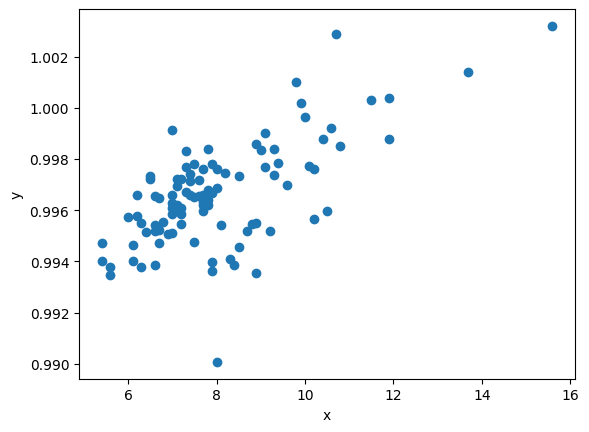

In [36]:
# Linear regression
# y = mx + b
# m is slope, b is y-intercept
# m = (mean(x) * mean(y) - mean(x*y)) / (mean(x)^2 - mean(x^2))
# b = mean(y) - m * mean(x)

# Calculate m and b
def best_fit_slope_and_intercept(xs, ys):
    m = ( ((mean(xs) * mean(ys)) - mean(xs*ys)) /
          ((mean(xs)*mean(xs)) - mean(xs*xs)) )
    b = mean(ys) - m*mean(xs)
    return m, b

# Calculate mean
def mean(values):
    return sum(values) / float(len(values))

# Plot the data
xs = np.array(df['x'], dtype=np.float64)
ys = np.array(df['y'], dtype=np.float64)
plt.scatter(xs, ys)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

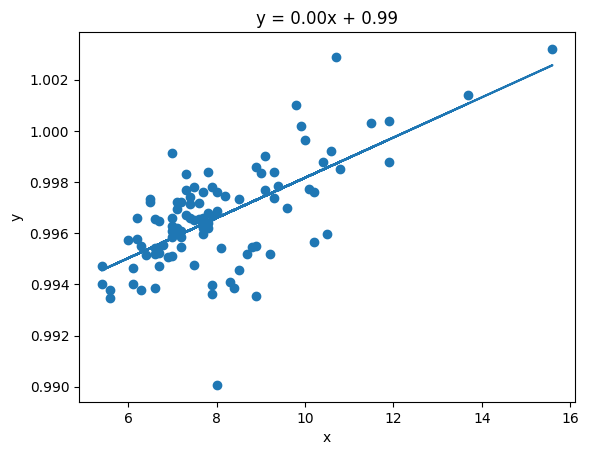

In [37]:
# Plot the regression line
m, b = best_fit_slope_and_intercept(xs, ys)
regression_line = [(m*x)+b for x in xs]
# print(regression_line)
plt.scatter(xs, ys)
plt.plot(xs, regression_line)
plt.title(f'y = {m:.2f}x + {b:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Enter x: 11


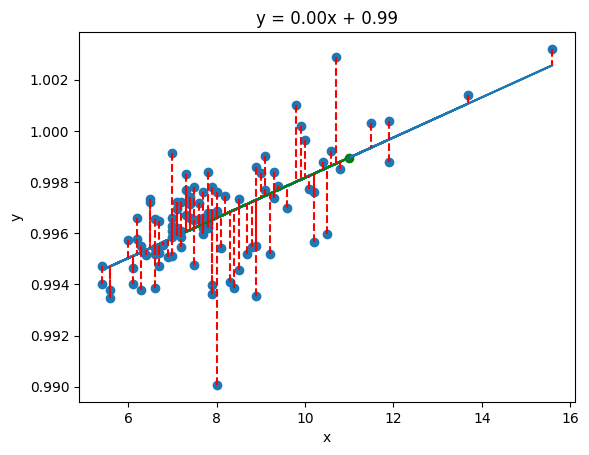

In [38]:
# Predict y for a given x
predict_x = float(input('Enter x: '))
predict_y = (m*predict_x)+b

# Plot the prediction
plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y, color='g')
plt.plot(xs, regression_line)
# Plot the prediction line
extended_x = [xs[-1], predict_x]
plt.plot(extended_x, [regression_line[-1], predict_y], color='g')
# Plot the errors (a dashed line from (xs, ys) to (xs, point_on_line(xs)))
for i in range(len(xs)):
    plt.plot([xs[i], xs[i]], [ys[i], regression_line[i]], color='r', linestyle='--')
plt.title(f'y = {m:.2f}x + {b:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()